# Aufgabe 3: Cross Validation and Grid Search 

We use sklearn's GridSearchCV and cross validation to search for an optimal number of kneighbors for the KNeighborsClassifier to maximize the precision of the classification of the iris data from task 1.

In [1]:
# imports
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

First we load the iris data from task 1 and split it into training and validation set.

In [2]:
# load dataset from task 1
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [3]:
# split-out and scale dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]

Then we specify our parameter space and performance metric.

In [4]:
# specify parameter space and performance metric
max_n = 30
k = list(range(1, max_n + 1))
parameter_grid = {"n_neighbors": k}
scoring = "accuracy"
cross_val = 10

Next we run a performance test on GridSearchCV. Therefor we search mulitple times to maximize the precision save the best time for later comparison. Each time we use a different number of jobs.

In [5]:
# parameter for performance test
max_jobs = 8
best_in = 3

In [6]:
# performance test
measurements = []
kneighbors = KNeighborsClassifier()
for i in range(max_jobs):
    min_t = float("inf")  
    grid_search = GridSearchCV(kneighbors, parameter_grid, cv=cross_val, scoring=scoring, n_jobs=i + 1)
    tr = %timeit -o grid_search.fit(X, y)    
    measurements.append(tr.best)

1 loop, best of 3: 718 ms per loop
1 loop, best of 3: 675 ms per loop
1 loop, best of 3: 650 ms per loop
1 loop, best of 3: 561 ms per loop
1 loop, best of 3: 560 ms per loop
1 loop, best of 3: 590 ms per loop
1 loop, best of 3: 512 ms per loop
1 loop, best of 3: 555 ms per loop


Finally we evaluate our results:

In [7]:
# best parameters found
print("Best parameters:")
print(grid_search.best_params_)
print("With accuracy:")
print(grid_search.best_score_)

Best parameters:
{'n_neighbors': 13}
With accuracy:
0.98


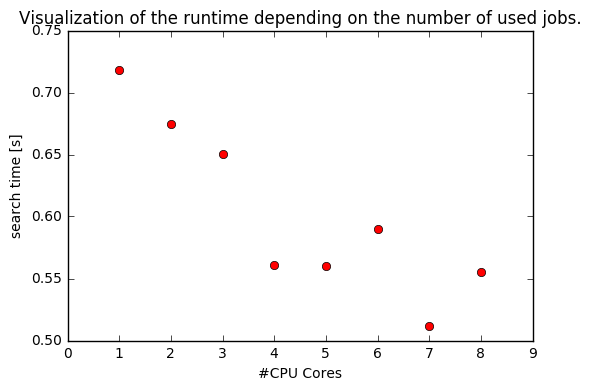

In [8]:
fig, ax = plt.subplots()
ax.plot(range(1, max_jobs + 1), measurements, 'ro')
ax.set_xlim([0, max_jobs + 1])

#plt.axis([0, len(num_cpu_list)+1, 0, max(training_times)+1])
plt.title('Visualization of the runtime depending on the number of used jobs.')
plt.xlabel("#CPU Cores")
plt.ylabel("search time [s]")
plt.show()

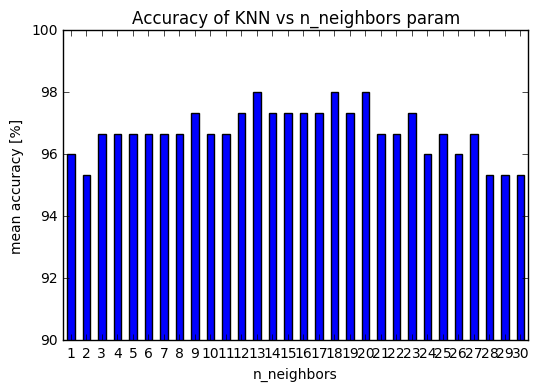

In [9]:
scores_all_percent = [100 * grid_score[1] for grid_score in grid_search.grid_scores_]
params_all = [grid_score[0]["n_neighbors"] for grid_score in grid_search.grid_scores_]

N = max_n
ind = np.arange(N) # the x locations for bars
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
ax.bar(ind + width/2, scores_all_percent, width)
ax.set_xticks(ind + width)
ax.set_xticklabels([str(i) for i in params_all])
ax.set_ylim([90,100])
plt.title("Accuracy of KNN vs n_neighbors param")
plt.xlabel("n_neighbors")
plt.ylabel("mean accuracy [%]")
plt.show()